In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker
import os
import csv

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241210_140025.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241210_140025.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    96052  1.733836e+09  0.110656  0.025840  0.113201   
 1             0    96053  1.733836e+09  0.110569  0.024798  0.113295   
 2             0    96054  1.733836e+09  0.110646  0.023683  0.113677   
 3             0    96055  1.733836e+09  0.110466  0.022728  0.113696   
 4             0    96056  1.733836e+09  0.110505  0.021584  0.114033   
 ...         ...      ...           ...       ...       ...       ...   
 5370438   57865  7642678  1.733911e+09 -0.074399 -0.184797  0.315044   
 5370439   57865  7642679  1.733911e+09 -0.074276 -0.185232  0.316705   
 5370440   57865  7642680  1.733911e+09 -0.074191 -0.185536  0.318847   
 5370441   57865  7642681  1.733911e+09 -0.074141 -0.185767  0.321551   
 5370442   57865  7642682  1.733911e+09 -0.074062 -0.185797  0.324188   
 
              xvel      yvel      zvel           P00           P01  \
 0       -0.010529 -0.096444  0.004224  7.514818e-08

In [4]:
data = extract_stimulus_centered_data(df,csvs["opto"])

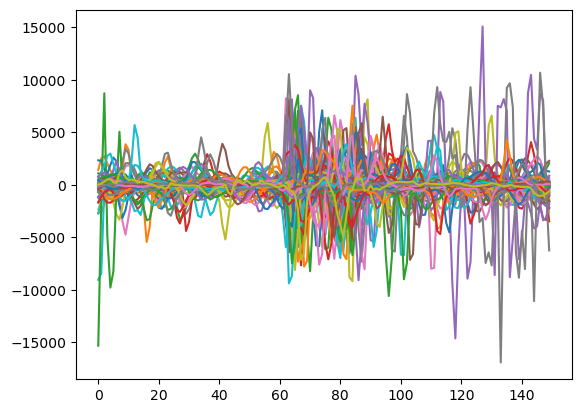

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

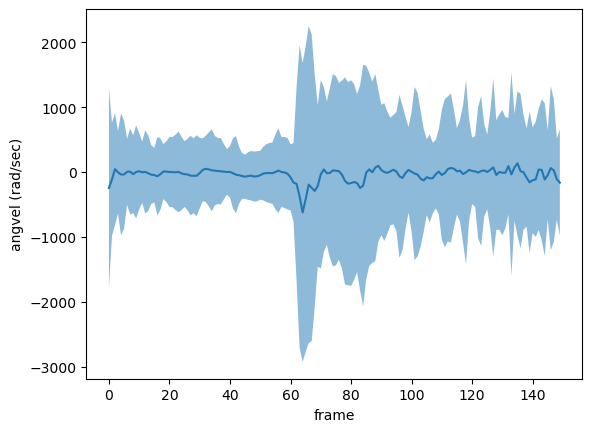

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

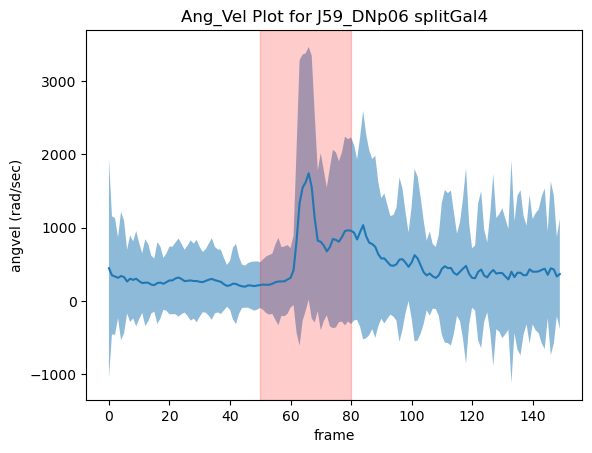

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
ax.axvspan(50, 80, color='red', alpha=0.2)
ax.set_title("Ang_Vel Plot for J59_DNp06 splitGal4")
plt.show()

<Axes: >

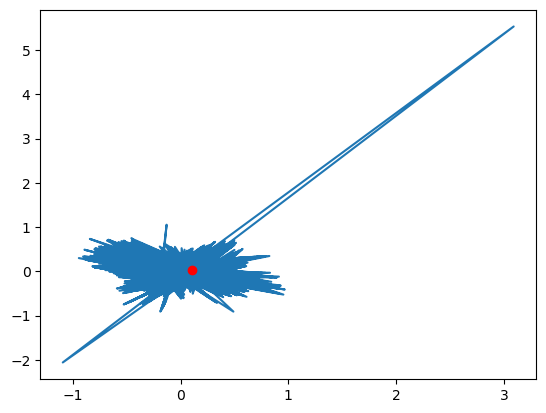

In [8]:
plot_trajectory(df)

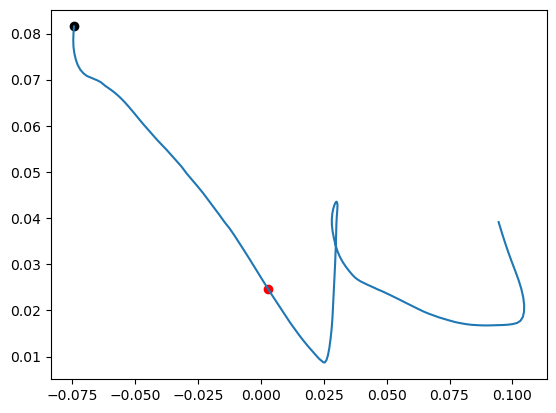

In [9]:
i = 120
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

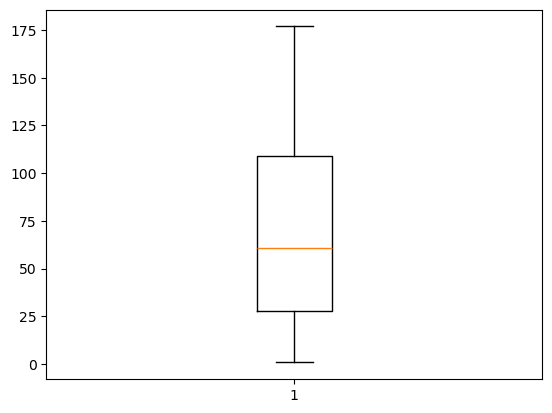

In [10]:
heading_diffs = []
for traj in data["position"]:
    heading_diffs.append(heading_direction_diff(traj, origin=50, end=80, n=10))

plt.figure()
plt.boxplot(np.abs(heading_diffs))
plt.show()
